# Task 4: Exploratory Data Analysis - Terrorism
## <blockquote>Finding out the hot zone of terrorism.</blockquote>
### Author: Marisha Bhatti
<br>
<br>

  - <b>Step 1:</b> Import all required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 - <b>Step 2:</b> Import the datasets

The dataset can be downloaded from https://www.kaggle.com/START-UMD/gtd

In [2]:
df = pd.read_csv("/home/marisha/Downloads/Global Terrorism - START data/globalterrorismdb_0718dist.csv",encoding = 'ISO-8859-1')
print(df.shape)
pd.set_option('display.max_columns',None)
df.head(10)

/home/marisha/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
df.describe() # statistical representation of data

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [4]:
pd.set_option('display.max_rows',None)
df.isna().sum() # checking for NA

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

 - <b>Step 3:</b> Exploratory Data Analysis and Data Visualization

###### Region-wise Analysis

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: extended, dtype: int64

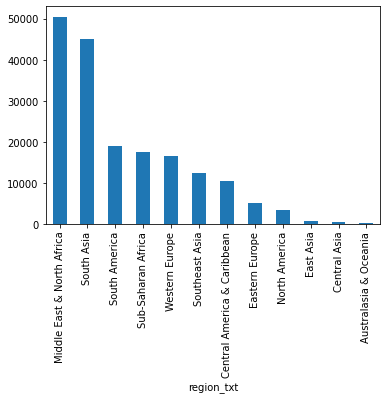

In [5]:
region=df.groupby('region_txt').count().sort_values('extended', ascending=False)['extended']
region.plot.bar()
region

Middle East & North Africa has the most terrorist attacks.<br>South Asia has second most terrorist attacks.

region_txt
Middle East & North Africa     137642.0
South Asia                     101319.0
Sub-Saharan Africa              78386.0
South America                   28849.0
Central America & Caribbean     28708.0
Southeast Asia                  15637.0
Eastern Europe                   7415.0
Western Europe                   6694.0
North America                    4916.0
East Asia                        1152.0
Central Asia                     1000.0
Australasia & Oceania             150.0
Name: nkill, dtype: float64

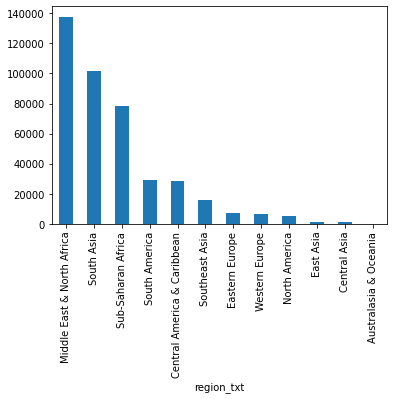

In [6]:
# Number of people killed region wise
kill=df.groupby('region_txt').sum().sort_values(by='nkill', ascending=False)['nkill']
kill.plot.bar()
kill

region_txt
Middle East & North Africa     214308.0
South Asia                     141360.0
Sub-Saharan Africa              52857.0
Southeast Asia                  26259.0
North America                   21531.0
Western Europe                  18332.0
South America                   16704.0
Eastern Europe                  12045.0
East Asia                        9213.0
Central America & Caribbean      8991.0
Central Asia                     2009.0
Australasia & Oceania             260.0
Name: nwound, dtype: float64

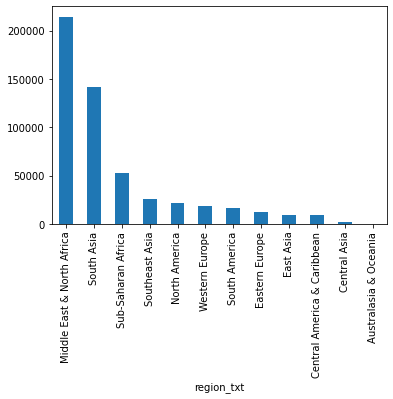

In [7]:
# Number of people wounded region wise
wound=df.groupby('region_txt').sum().sort_values(by='nwound', ascending=False)['nwound']
wound.plot.bar()
wound

country_txt
Iraq                        24636
Turkey                       4292
Yemen                        3347
Algeria                      2743
Egypt                        2479
Lebanon                      2478
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Israel                       2183
Iran                          684
Saudi Arabia                  371
Bahrain                       207
Jordan                        113
Tunisia                       109
Kuwait                         76
Morocco                        36
United Arab Emirates           22
Qatar                           7
North Yemen                     6
Western Sahara                  5
South Yemen                     2
International                   1
Name: extended, dtype: int64

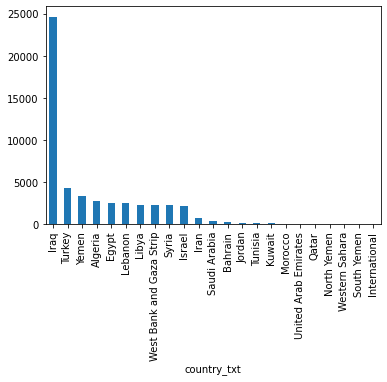

In [8]:
# Country in Middle East and North Africa with most terrorist attacks
mena=df[df.region==10].groupby('country_txt').count().sort_values('extended', ascending=False)['extended']
mena.plot.bar()
mena

Iraq has the most terrorist attacks in middle east.

country_txt
Pakistan       14368
Afghanistan    12731
India          11960
Sri Lanka       3022
Bangladesh      1648
Nepal           1215
Maldives          22
Bhutan             6
Mauritius          2
Name: extended, dtype: int64

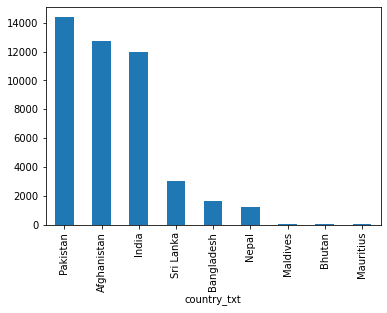

In [9]:
# Country in South Asia with most terrorist attacks
sa=df[df['region_txt']=='South Asia'].groupby('country_txt').count().sort_values('extended', ascending=False)['extended']
sa.plot.bar()
sa

Pakistan, Afghanistan and India are in the Top 3 in South Asia.

###### Country-wise Analysis

country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: extended, dtype: int64

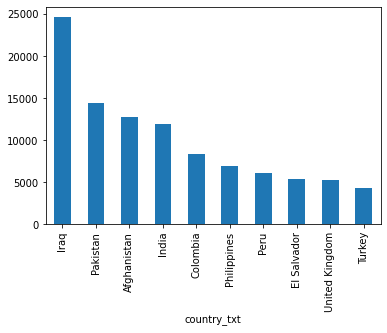

In [10]:
country=df.groupby('country_txt').count().sort_values('extended', ascending=False).head(10)['extended']
country.plot.bar()
country

Iraq, Pakistan and Afghanistan are the Top 3 countries with most terrorist attacks.

country_txt
Iraq           78589.0
Afghanistan    39384.0
Pakistan       23822.0
Nigeria        22682.0
India          19341.0
Sri Lanka      15530.0
Syria          15229.0
Colombia       14698.0
Peru           12771.0
El Salvador    12053.0
Name: nkill, dtype: float64

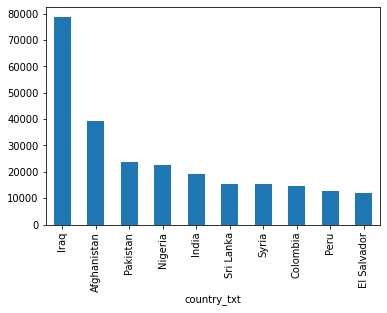

In [11]:
# Number of people killed region wise
kill=df.groupby('country_txt').sum().sort_values(by='nkill', ascending=False).head(10)['nkill']
kill.plot.bar()
kill

region_txt
Middle East & North Africa     214308.0
South Asia                     141360.0
Sub-Saharan Africa              52857.0
Southeast Asia                  26259.0
North America                   21531.0
Western Europe                  18332.0
South America                   16704.0
Eastern Europe                  12045.0
East Asia                        9213.0
Central America & Caribbean      8991.0
Name: nwound, dtype: float64

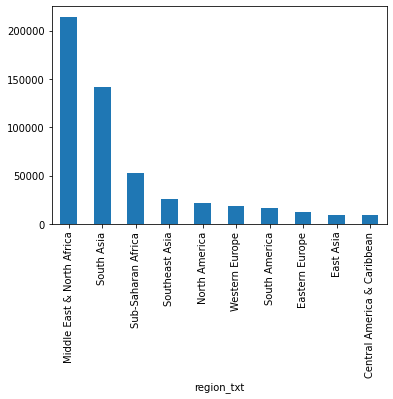

In [12]:
# Number of people wounded region wise
wound=df.groupby('region_txt').sum().sort_values(by='nwound', ascending=False).head(10)['nwound']
wound.plot.bar()
wound

###### Analysis of Terrorist Attacks in the 21st century

In [13]:
df_new=df[df['iyear']>2000]
print(len(df_new))
df_new.shape[0]/df.shape[0]*100
df_new.head(10)

110041


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
71650,200101000001,2001,1,0,"January 8-9, 2001",0,NaN,45,Colombia,3,South America,Valle del Cauca,Unknown,3.800889,-76.641271,4.0,0,NaN,1/8/2001: Paramilitaries killed three farmers ...,1,0,1,1.0,3.0,Intra/Inter-group Conflict,0.0,1,0,9,Unknown,NaN,NaN,NaN,NaN,14,Private Citizens & Property,72.0,Farmer,Civilians,Farmers in Valle province,45.0,Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paramilitaries,NaN,NaN,NaN,NaN,NaN,"Specific motive is unknown; however, authoriti...",1.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No specific mention of weapons was made,3.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sources imply that the attack may have taken p...,"""Twenty murdered in attacks across Colombia at...","""Colombia violence leaves 35 dead,"" Agence Fra...",NaN,UMD Schmid 2012,-9,-9,0,-9,NaN
71651,200101010001,2001,1,1,NaN,0,NaN,228,Yemen,10,Middle East & North Africa,Adan,Aden,12.825647,44.846416,1.0,0,NaN,01/01/2001: The wall of an Anglican Church was...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Anglican Church,Aden Anglican Church,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,1.0,1.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,One wall of the Church was damaged due to the ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bomb Blast Outside Yemeni News Agency Office ...,"Authorities Arrest Suspects in Aden Bombings,...",NaN,CETIS,-9,-9,0,-9,NaN
71652,200101010002,2001,1,1,NaN,1,1/7/2001,45,Colombia,3,South America,Bogota,Bogota district,4.598100,-74.076030,3.0,0,The victims were taken 180 miles northeast of ...,01/01/2001: The United Self-defense Forces of ...,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,14,Private Citizens & Property,71.0,Race/Ethnicity Identified,Civilians,Colombian Peasants,45.0,Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Self Defense Units of Colombia (AUC),NaN,NaN,NaN,NaN,NaN,The peasants were taken until it could be prov...,0.0,NaN,NaN,0,NaN,0.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,

region_txt
Middle East & North Africa     40806
South Asia                     36855
Sub-Saharan Africa             12853
Southeast Asia                  9306
Eastern Europe                  3779
Western Europe                  2947
South America                   2358
North America                    607
Central Asia                     207
East Asia                        179
Central America & Caribbean       75
Australasia & Oceania             69
Name: extended, dtype: int64

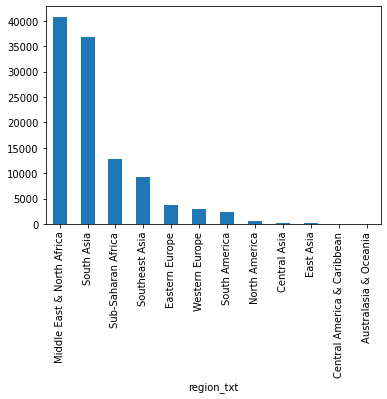

In [14]:
# Visualise
df_new=df_new.groupby('region_txt').count().sort_values('extended', ascending=False)['extended']
df_new.plot.bar()
df_new

<AxesSubplot:xlabel='region_txt'>

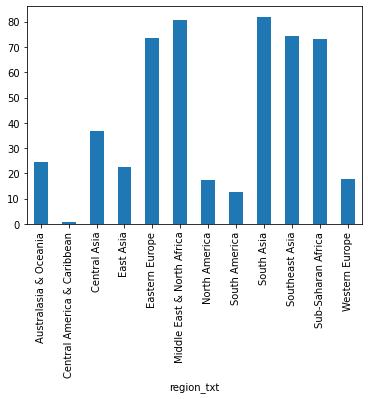

In [15]:
# Graph of percentage of terrorist attacks after 2000 compared to total terrorist attacks
(df_new/region*100).plot.bar()

In Eastern Europe, Middle East, South asia, Southeast Asia and subsaharan Africa there has been a huge increase in terrorist attacks whereas other regions have seen a decrease since 2001.

###### Mapping

In [16]:
df= df[df['longitude']!=df.longitude.min()]
df.shape

(181690, 135)

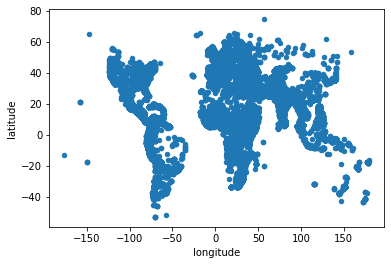

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
df.plot(kind="scatter", x="longitude", y="latitude")
plt.ticklabel_format(style='plain')
plt.show()

# <b>_____________</b>